In [2]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# Reading the csv file
df=pd.read_csv("/Users/harishsarvepalli/Github_projects/WA_Fn-UseC_-HR-Employee-Attrition 2.csv")


Data Wrangling

In [4]:
#Data Wrangling
def data_wrangling():

    # Displaying the number of rows and columns
    print(df.shape)
    #Displaying the column names
    print(df.columns)
    #Checking the data type
    print(df.dtypes)
    # Checking for any missing values
    print(df.isna().sum())
    #Displaying the first 5 rows
    print(df.head(5))
    #Checking for duplicate values
    print(df.duplicated().sum())
    #Dropping the columns that are not required
    df.drop(['DailyRate','Education','RelationshipSatisfaction','EmployeeNumber','MaritalStatus'],axis=1,inplace=True)

    


In [5]:
Insights="The insights derived from data wrangling are as follows \n.The dataset is has 1470 rows and 35 columns with details of IBM employees and attrition \n.The datatypes of each column are appropriate \n.The dataset has no missing values \n.A few columns that are not required for analysis have been dropped such as marital status, dailyrate,etc which do not impact the analysis \n. The dataset has no duplicate values too."
print(Insights)

The insights derived from data wrangling are as follows 
.The dataset is has 1470 rows and 35 columns with details of IBM employees and attrition 
.The datatypes of each column are appropriate 
.The dataset has no missing values 
.A few columns that are not required for analysis have been dropped such as marital status, dailyrate,etc which do not impact the analysis 
. The dataset has no duplicate values too.


# Data Analysis
#Defining the filter of Attrition=Yes as global variable

In [31]:
filtered_df = df[df['Attrition'] == 'Yes']
def data_analysis1():

    #Exploratory data analysis
    print(df.describe())


    # Count the number of exits (Filtering the Attrition column)
    print(df.Attrition.value_counts())
    attrition_count_df = filtered_df.groupby('Department')[['Attrition']].agg('count')
    print(attrition_count_df)
    percentage_of_total=attrition_count_df.Attrition/attrition_count_df.Attrition.sum()*100
    print(percentage_of_total)
    sizes=percentage_of_total
    labels=['Human Resources','R&D','Sales']
    plt.pie(sizes,labels=labels,autopct='%1.1f%%')
    plt.title('Attrition by department')
    insight_text = "Insights:\n 1.There are total 237 exits\n 2. R&D department has the highest attrition followed by Sales and HR \n 3. 133 employees out of 961 from R&D team quit \n 4. 92 employees out of 446 from Sales team left the organization,\n whereas only 12 out of 63 employees from HR team quit."
    plt.text(-4.0,0.7, insight_text, fontsize=10)
    plt.show()

def data_analysis2():
    gender_pivot_table=pd.pivot_table(data=filtered_df,index='Department',columns='Gender',values='Attrition',aggfunc='count')
    print(gender_pivot_table)
    gender_pivot_table.plot(kind='bar')
    plt.figure(figsize=(10,6))
    plt.xlabel('Department')
    plt.ylabel('Gender')
    plt.title('Gender wise Attrition')
    insight_text = "Insights:\n 1. More men left the organization than women\n 2.Average age of employees leaving the company is in the range of 29-34 \n 3. More than 50% of the exits are in Entry level in both men and women"
    plt.text(-0.4,69, insight_text, fontsize=8)
    plt.show()


def data_analysis3(): 
    # Relation between job satisfaction and Attrition
    job_satisfaction_pivot_table=pd.pivot_table(data=filtered_df,index='JobSatisfaction',columns='Department',values='Attrition',aggfunc='count')
    print(job_satisfaction_pivot_table)
    job_satisfaction_pivot_table.plot(kind='bar')
    plt.figure(figsize=(15,6))
    plt.xlabel('JobSatisfaction')
    plt.ylabel('Number of exits')
    plt.title("Job Satisfaction Vs attrition")
    insight_text = "Insights:\n.1. There seems to be no correlation between job satisfaction and attrition\n. 2. The number of exits are more in job satisfaction rating of 1 &3 "
    plt.text(-0.4,38.95, insight_text, fontsize=12)
    plt.show()
     
def data_analysis4():
# # # Bucketing the Tenure into years category

    tenure=[]


    for value in df.YearsAtCompany:
        if value>=0 and value<1:
            tenure.append('0-1 years')
        elif value>=1 and value<3:
            tenure.append('1-3 years')
        elif value>=3 and value<5:
            tenure.append('3-5 years')
        elif value>=5 and value<10:
            tenure.append('5-10 years')
        else:
            tenure.append('>10 years')       
    
    df['Tenure_bucket']=tenure
    # print(df.columns)

# # New joinee attrition-Department wise
    # filtered_df_Tenure=df[df['Tenure with the company']=='0-1 years']
    filtered_df = df[df['Attrition'] == 'Yes']
    newjoine_table=pd.pivot_table(data=filtered_df,index='Tenure_bucket',columns='Department',values='Attrition',aggfunc='count')
    print(newjoine_table)
    newjoine_table.plot(kind='bar')
    plt.figure(figsize=(15,6))
    plt.xlabel('Tenure')
    plt.ylabel('Department')
    plt.title('Attrition-Tenure wise')
    insight_text = "Insights:\n. 1. There is no new joinee attrition in HR department \n 2. More than 35% of exits are from 1-3 years tenured employees\n at 1&2 job level\n 3. It is concerning to see all top performers with 3&4 rating \n are leaving the company"
    plt.text(1.2,39.94, insight_text, fontsize=15)
    plt.show()

def data_analysis5():

# # # Career growth Vs attrition


    tenure_promotion=[]


    for value in df.YearsSinceLastPromotion:
        if value>=0 and value<1:
            tenure_promotion.append('0-1 years')
        elif value>=1 and value<3:
            tenure_promotion.append('1-3 years')
        elif value>=3 and value<5:
            tenure_promotion.append('3-5 years')
        elif value>=5 and value<10:
            tenure_promotion.append('5-10 years')
        else:
            tenure_promotion.append('>10 years')       

    df['Time_since_last_promotion']=tenure_promotion
    print(df['Time_since_last_promotion'].head(5))
    filtered_df = df[df['Attrition'] == 'Yes']
    # filtered_df_Tenure_in_current_level=df[df['Tenure_in_current_level']=='3-5 years']
    promotion_table=pd.pivot_table(data=filtered_df,index='Time_since_last_promotion',columns='Department',values='Attrition',aggfunc='count')
    print(promotion_table)

    promotion_table.plot(kind='bar')
    plt.xlabel('Time since last promotion')
    plt.ylabel('Department')
    plt.title('Career growth Vs Attrition')
    insight_text = "Insights:\n. 1. More number of exits in time less than 1 year of promotion \n 2. More than 80% of exits are from Laboratory technician and Research scientist in \n R&D team with less than 2 years of promotion\n  3. Nature of work of these two job roles must be evaluated \n as employees are leaving in less time"
    plt.text(1.2,37.94, insight_text, fontsize=9)
    plt.figure(figsize=(20,6))
    plt.show()

# # Performance rating vs Number of exits
    performance_table=pd.pivot_table(data=filtered_df,index='PerformanceRating',values='Attrition',aggfunc='count')
#     # attrition_count_pr_df = filtered_df.groupby('PerformanceRating')[['Attrition']].agg('count')
    print(performance_table)

def data_analysis6():

# # Salary hikes Vs Attrition

    attrition=df[df['Attrition'] == 'Yes']
    salary_hike__table=pd.pivot_table(data=attrition,index='PercentSalaryHike',values='Attrition',aggfunc='count')
    print(salary_hike__table)

    plt.scatter(salary_hike__table.index, salary_hike__table['Attrition'])
    plt.xlabel('Percentage of Salary Hiked')
    plt.ylabel('Attrition')
    plt.title('Percentage of Salary Hiked vs. Attrition') 
    # insight_text = "Insights:\n. 1. There is a clear correlation that attrition reduces with increase in percentage of salary hike \n 2. Compensation benchmarking can be done to \n roles such as Sales executive, lab technician and Research scientist \n as there is more attrition in these roles with less salary hikes"
    # plt.text(14.25,35.03, insight_text, fontsize=9)
    plt.show() 

def data_analysis7():

# # Salary hikes Vs tenure in the company
    hike_table_df=pd.pivot_table(data=df,index='YearsAtCompany',values='PercentSalaryHike',aggfunc='mean')
    # filter_df=df.groupby('PercentSalaryHike')[['YearsAtCompany']].agg('count')
    # print(filter_df)
    print(hike_table_df)
    hike_table_df.plot(kind='line')
    plt.xlabel("Years at company")
    plt.ylabel('Percentage of salary hike')
    plt.title("Salary vs tenure")
    insight_text = "Insights:\n 1. Percentage of hikes given to employees varies by tenure in the company \n 2. There seems to be gender parity in hikes \n given to both female and male based on tenure "
    plt.text(-1.80,20.32, insight_text, fontsize=9)
    plt.show()

Data Visualization

In [7]:
def data_analysis():
    
    user_input=input("What do you want to analyze?"
    "Enter 1 for attrition- department wise"
    "Enter 2 for gender wise Attrition"
    "Enter 3 for Job satisfaction vs number of exits"
    "Enter 4 for Tenure wise attrition"
    "Enter 5 for career growth vs number of exits"
    "Enter 6 for Salary hikes vs number of exits"
    "Enter 7 for Salary hikes vs tenure ")
    if user_input=='1':
        data_analysis1()
    elif user_input=='2':
        data_analysis2()
    elif user_input=='3':
        data_analysis3()
    elif user_input=='4':
        data_analysis4()
    elif user_input=='5':
        data_analysis5()
    elif user_input=='6':
        data_analysis6()
    elif user_input=='7':
        data_analysis7()
    else:
        print("enter the correct input")
    


In [8]:
data_wrangling()


(1470, 35)
Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')
Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              objec

               Age  DistanceFromHome  EmployeeCount  EnvironmentSatisfaction  \
count  1470.000000       1470.000000         1470.0              1470.000000   
mean     36.923810          9.192517            1.0                 2.721769   
std       9.135373          8.106864            0.0                 1.093082   
min      18.000000          1.000000            1.0                 1.000000   
25%      30.000000          2.000000            1.0                 2.000000   
50%      36.000000          7.000000            1.0                 3.000000   
75%      43.000000         14.000000            1.0                 4.000000   
max      60.000000         29.000000            1.0                 4.000000   

        HourlyRate  JobInvolvement     JobLevel  JobSatisfaction  \
count  1470.000000     1470.000000  1470.000000      1470.000000   
mean     65.891156        2.729932     2.063946         2.728571   
std      20.329428        0.711561     1.106940         1.102846   
min    

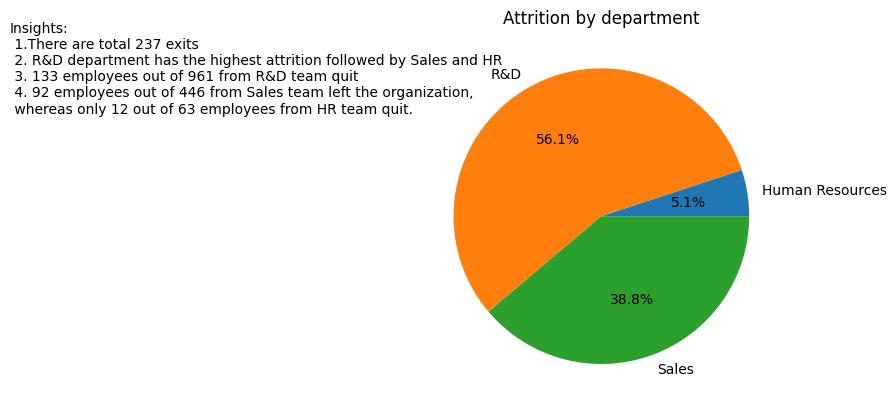

In [9]:
data_analysis()

Gender                  Female  Male
Department                          
Human Resources              6     6
Research & Development      43    90
Sales                       38    54


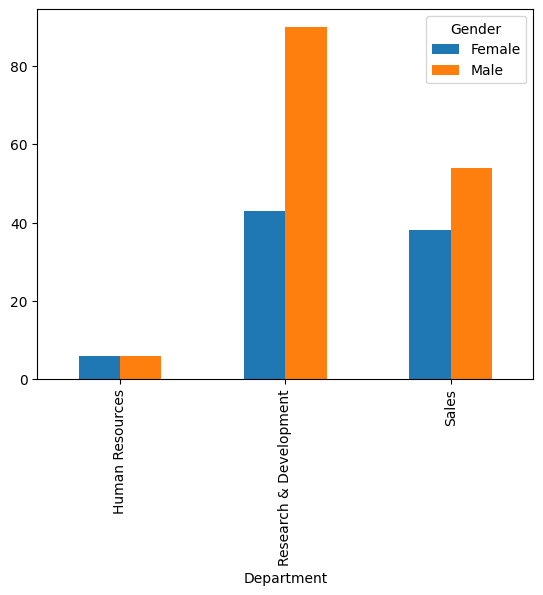

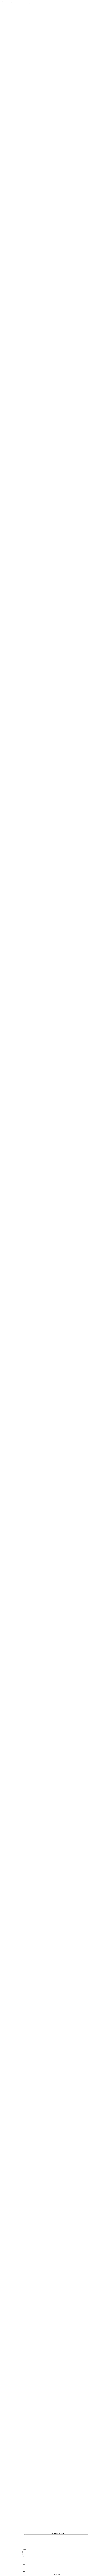

In [13]:
data_analysis()

Department       Human Resources  Research & Development  Sales
JobSatisfaction                                                
1                              5                      38     23
2                              2                      24     20
3                              3                      43     27
4                              2                      28     22


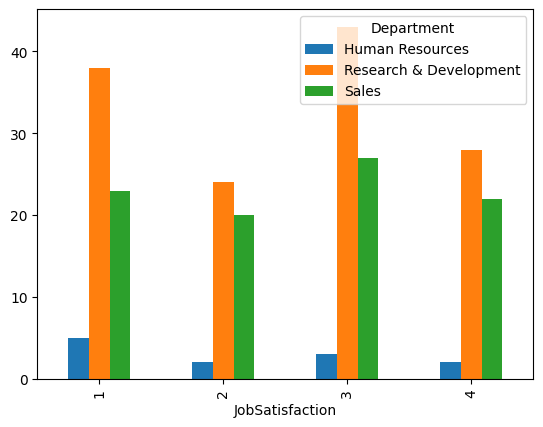

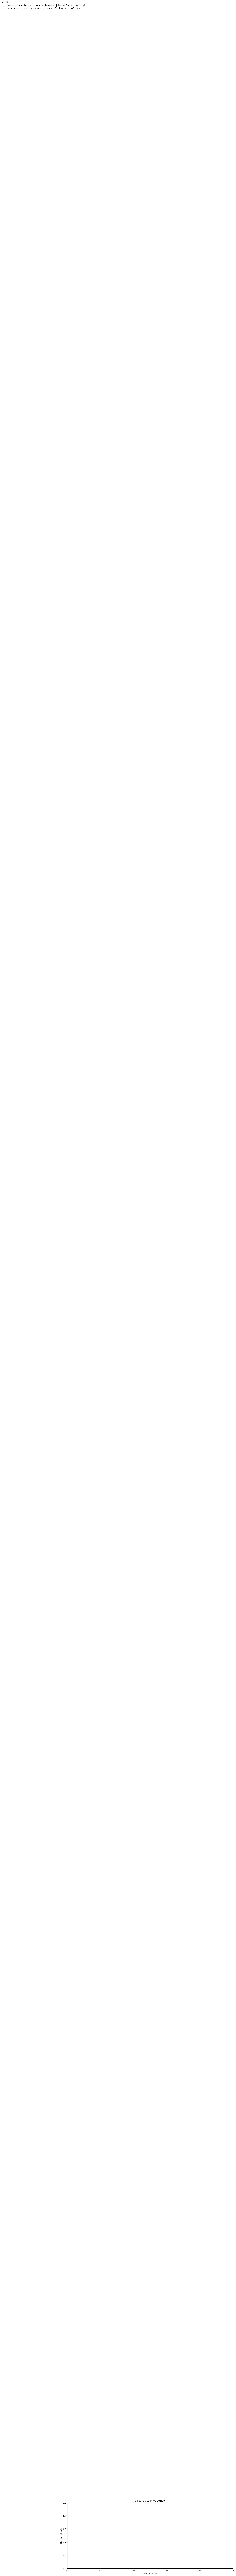

In [20]:
data_analysis()

Department     Human Resources  Research & Development  Sales
Tenure_bucket                                                
0-1 years                  NaN                     9.0    7.0
1-3 years                  6.0                    51.0   29.0
3-5 years                  3.0                    19.0   17.0
5-10 years                 2.0                    33.0   23.0
>10 years                  1.0                    21.0   16.0


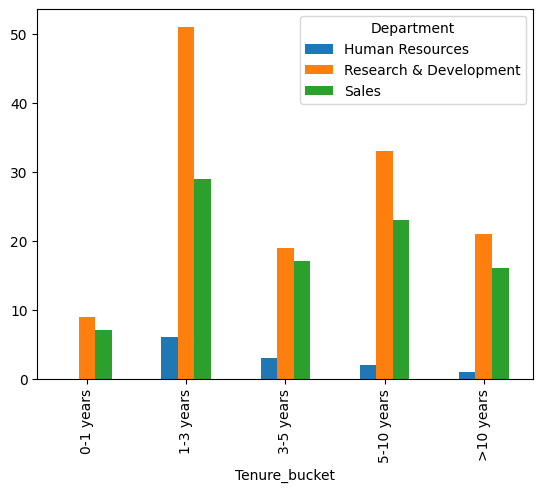

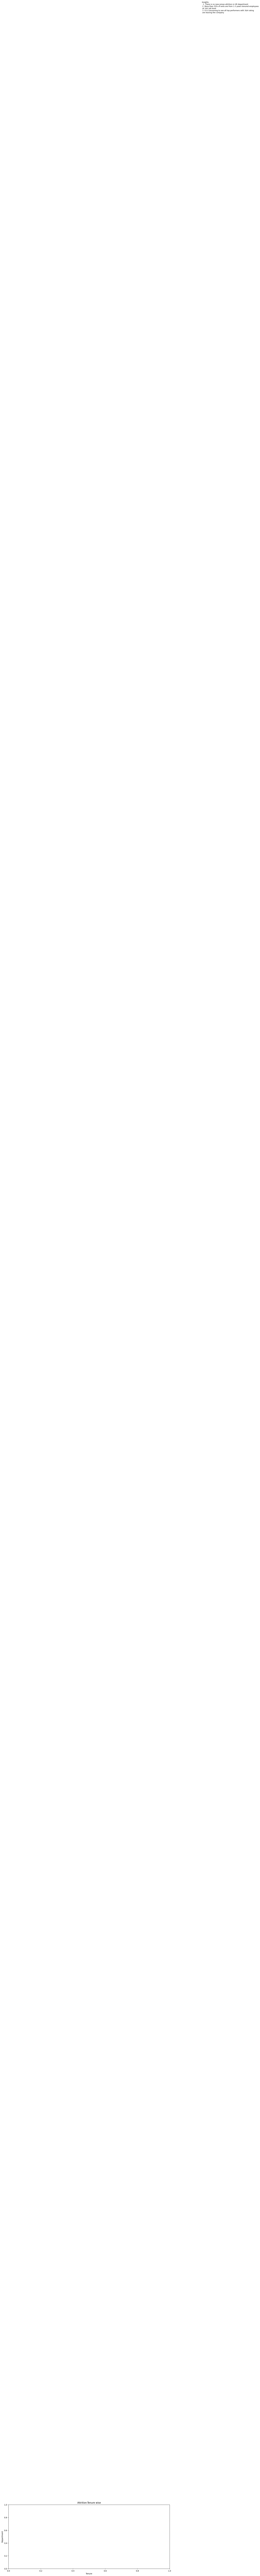

In [24]:
data_analysis()

0    0-1 years
1    1-3 years
2    0-1 years
3    3-5 years
4    1-3 years
Name: Time_since_last_promotion, dtype: object
Department                 Human Resources  Research & Development  Sales
Time_since_last_promotion                                                
0-1 years                              6.0                    65.0   39.0
1-3 years                              5.0                    42.0   29.0
3-5 years                              1.0                     6.0    7.0
5-10 years                             NaN                    15.0   13.0
>10 years                              NaN                     5.0    4.0


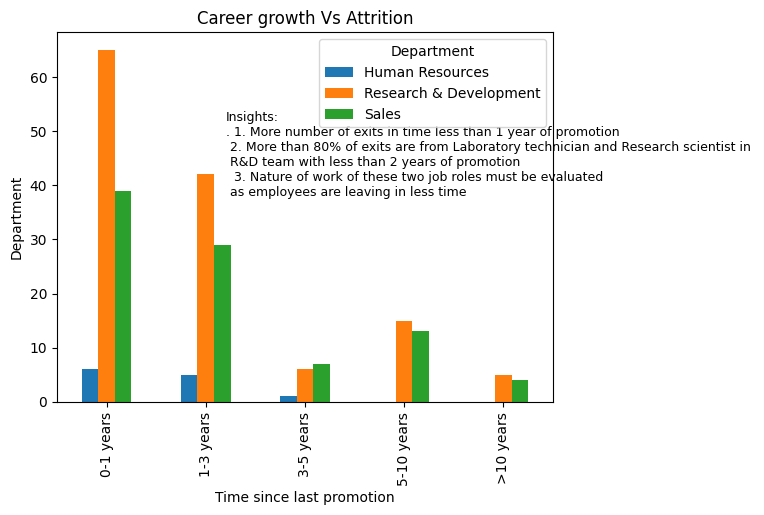

<Figure size 2000x600 with 0 Axes>

                   Attrition
PerformanceRating           
3                        200
4                         37


In [29]:
data_analysis()

                   Attrition
PercentSalaryHike           
11                        41
12                        33
13                        34
14                        24
15                        18
16                        14
17                        14
18                        13
19                         9
20                         7
21                         5
22                        12
23                         6
24                         6
25                         1


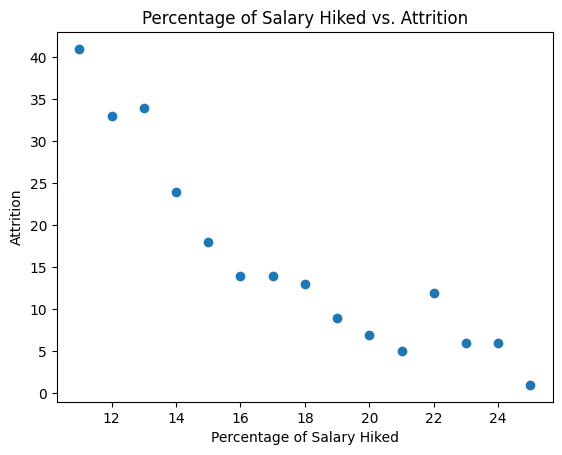

In [32]:
data_analysis()

                PercentSalaryHike
YearsAtCompany                   
0                       15.454545
1                       15.760234
2                       15.047244
3                       15.390625
4                       14.872727
5                       15.260204
6                       14.605263
7                       14.700000
8                       15.412500
9                       15.268293
10                      15.033333
11                      16.406250
12                      15.642857
13                      16.083333
14                      15.000000
15                      14.600000
16                      15.250000
17                      16.666667
18                      14.923077
19                      15.090909
20                      15.259259
21                      15.071429
22                      13.533333
23                      17.000000
24                      15.666667
25                      13.250000
26                      15.000000
27            

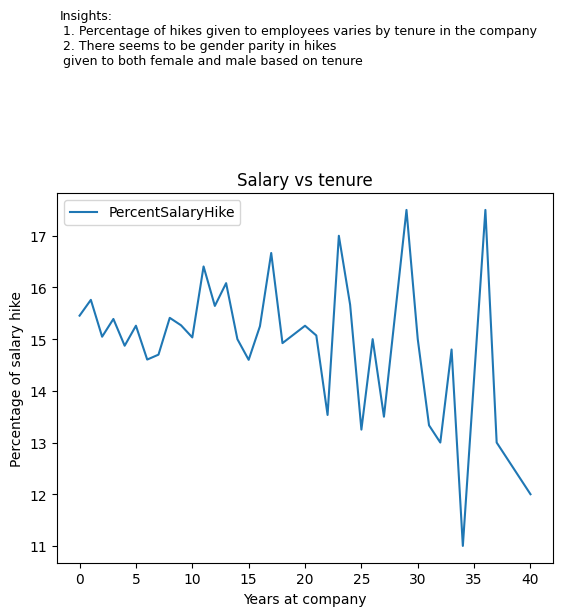

In [33]:
data_analysis()

In [34]:
insight_text = "Insights:\n. 1. There is a clear correlation that attrition reduces with increase in percentage of salary hike \n 2. Compensation benchmarking can be done to \n roles such as Sales executive, lab technician and Research scientist \n as there is more attrition in these roles with less salary hikes"
    # plt.text(14.25,35.03, insight_text, fontsize=9)